In [1]:
# import pickle 
# import numpy as np
# import matplotlib.pyplot as plt
# import json

# evaluation_for = "test"
# article_type= "tops"
# attribute = "neck"
# train_type = 'progressive'

# test_file_path = base_folder + article_type+'/'+article_type+'_'+attribute+'/'+article_type+'_'+attribute+'_new_'+evaluation_for+'.txt'
# predictionStorePath = base_folder + article_type+'/'+article_type+'_'+attribute+'/evaluation-progressive/'+evaluation_for+'/predictions.txt'
# label_map_file = base_folder + article_type+'/'+article_type+'_'+attribute+ '/'+article_type+'_'+attribute+'_label_map.txt'

In [2]:

import pickle 
import numpy as np
import matplotlib.pyplot as plt
import json

evaluation_for = "test"
article_type= "tops"
attribute = "neck"
base_folder = '/rapid_data/myntra/myntra_data/'
train_type = 'individual'

test_file_path = base_folder + article_type+'/'+article_type+'_'+attribute+'/'+article_type+'_'+attribute+'_new_'+evaluation_for+'.txt'
predictionStorePath = base_folder + article_type+'/'+article_type+'_'+attribute+'/evaluation-v3/'+evaluation_for+'/predictions.txt'
label_map_file = base_folder + article_type+'/'+article_type+'_'+attribute+ '/'+article_type+'_'+attribute+'_label_map.txt'


/home/ubuntu/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [3]:
test_list = []
with open(test_file_path) as f:
        test_list = f.readlines()
len(test_list)

labels = {}
with open(label_map_file) as f:
        labels = f.readline()
labels  = json.loads(labels)
label_map = {v: k for k, v in labels.iteritems()}
label_map

{0: u'High Neck',
 1: u'Round Neck',
 2: u'Scoop Neck',
 3: u'Boat Neck',
 4: u'V-Neck',
 5: u'Keyhole Neck',
 6: u'Mandarin Collar',
 7: u'Off-Shoulder',
 8: u'Shoulder Straps',
 9: u'Tie-Up Neck',
 10: u'Cowl Neck',
 11: u'Shirt Collar',
 12: u'Square Neck',
 13: u'One Shoulder'}

In [4]:
all_results=[]
with open(predictionStorePath, 'r') as f:
            #all_results = f.read().splitlines()
            all_results = pickle.load(f)
len(all_results)

7295

In [5]:
Y_true_list = [int(line.split(' ')[1]) for line in test_list]
Y_pred_list = [result[1] for result in all_results]

In [6]:
temp = np.array(Y_true_list)
Y_test = np.zeros((temp.size, temp.max()+1))
Y_test[np.arange(temp.size),temp] = 1

#temp = np.array(Y_pred_list)
#y_pred = np.zeros((temp.size, temp.max()+1))
#y_pred[np.arange(temp.size),temp] = 1
y_pred = np.array(Y_pred_list)

In [7]:
y_pred[1].shape

(14,)

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
n_classes = Y_test.shape[1]
precision_avg = 0
for i in range(n_classes):
    precision[i], recall[i], thresholds = precision_recall_curve(Y_test[:, i],
                                                        y_pred[:, i])
                                                       
    average_precision[i] = average_precision_score(Y_test[:, i], y_pred[:, i])
    precision_avg += average_precision[i]
    print (average_precision[i])
print ('avg', precision_avg/n_classes)
    
# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

0.5719871759918944
0.8632049031115161
0.7014777223837741
0.5025724697512267
0.8053278879988788
0.3986613804021687
0.6562786338213107
0.9460535770920712
0.8339430895389776
0.577459507550622
0.32198746137580075
0.5718928095609935
0.19287129518838345
0.7221528272039176
('avg', 0.6189907672122524)
Average precision score, micro-averaged over all classes: 0.77


In [10]:
# dresses- shape
# tops - neck
# jeans - fade


In [11]:
thresholds

array([0.00152936, 0.00152939, 0.00153252, ..., 0.99667275, 0.9968658 ,
       0.99782664], dtype=float32)

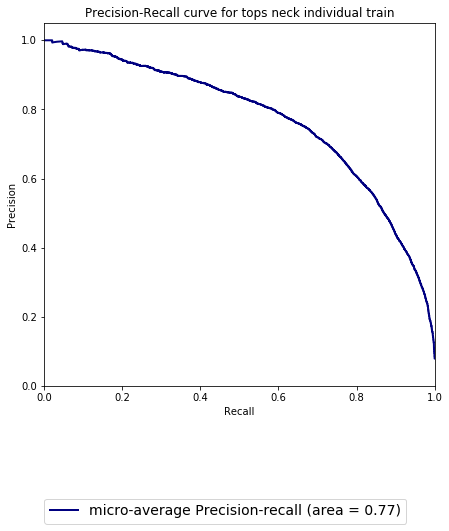

In [12]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])


plt.figure(figsize=(7,8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
'''
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
'''
l, = plt.plot(recall["micro"], precision["micro"], color='navy', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))
'''
for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(label_map[i], average_precision[i]))
'''
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve for '+article_type+' '+attribute+ ' '+train_type+ ' train')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()
